### **Linear Regression On the Student Dataset**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [1]:
#IMPORTING ALL REQUIRED LIBRARIES
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [51]:
#IMPORTING THE DATA FROM THE LINK GIVEN IN THE GRIP INSTRUCTIONS' PDF
st_url="http://bit.ly/w-data"
df=pd.read_csv(st_url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [12]:
df.keys()

Index(['Hours', 'Scores'], dtype='object')

# **PERFORMING THE INITIAL EXPLORATORY DATA ANALYSIS(EDA)**

In [13]:
#ASSIGNING KEYS TO TWO DIFFERENT VARIABLES
a=df['Hours']
b=df['Scores']

[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3172D47C8>


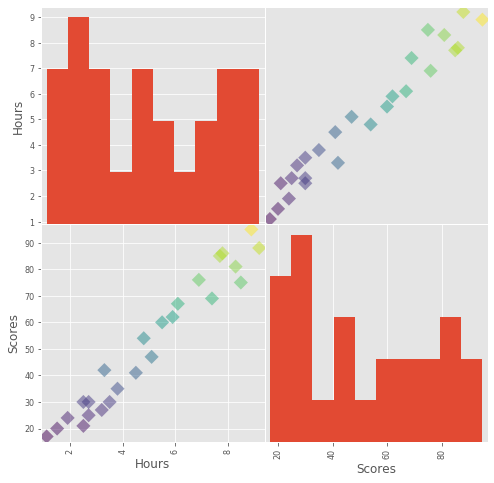

In [14]:
#SCATTER MATRIX PLOT
v=pd.plotting.scatter_matrix(df,c=b,figsize=[8,8],s=100,marker='D')
print(v)
#pd.plotting.scatter_matrix(df,color,figsize,s,marker)  c=color

# Using pandas we can create scatter matrices to easily visualise any trends in our data. Pandas uses matplotlib to display scatter matrices.

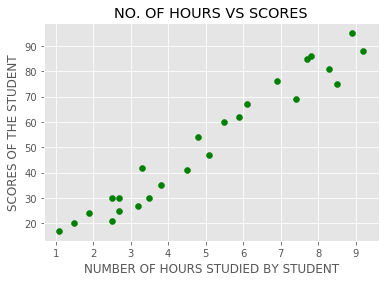

In [15]:
#PLOTTING A SCATTER PLOT
plt.scatter(a,b,color='green')
plt.xlabel('NUMBER OF HOURS STUDIED BY STUDENT')
plt.ylabel('SCORES OF THE STUDENT')
plt.title('NO. OF HOURS VS SCORES')
plt.show()

FROM THE ABOVE GRAPH WE CAN CONCLUDE THAT THE VARIABLES a(NUMBER OF HOURS STUDIED BY STUDENT) AND b(SCORES OF THE STUDENT)
HAVE A HIGH POSITIVE LINEAR CORRELATION
HIGH POSITIVE – ALL POINTS ARE NEARBY

# SPLITTING THE DATA INTO FEATURES AND LABELS

In [16]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [25]:
#USING train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

If one does not mention the random_state in the code, then whenever the person executes your code a new random value is generated and the train and test datasets would have different values each time.

However, if the person use a particular value for random_state(random_state = 1 or any other value) everytime the result will be same,i.e, same values in train and test datasets.

### **TRAINING THE MODEL**

In [27]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
#REGRESSORS PREDICTION OVER THE RANGE OF DATA  USING LINSPACE()
pred=np.linspace(min(X),max(X)).reshape(-1,1)

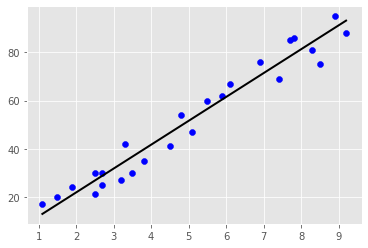

In [33]:
plt.scatter(X,y,color='blue')
plt.plot(pred,reg.predict(pred),color='black',linewidth=2)
plt.show()

In [82]:
#TO CHECK THE ACCURACY OF THE MODEL WE USE THE SCORE() METHOD 
acc=reg.score(X_test,y_test)
print("The accuracy of the Linear Regression Model created above is: ",acc)

The accuracy of the Linear Regression Model created above is:  0.9454906892105356


### PREDICTION

In [37]:
y_pred=reg.predict(X_test)# Predicting the scores

In [88]:
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [63]:
#COMPARING THE ACTUAL VS PREDICTED SCORES
p_df= pd.DataFrame({'ACTUAL SCORE':y_test,'PREDICTED SCORE':y_pred})
p_df

,ACTUAL SCORE,PREDICTED SCORE
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [81]:
#TESTING OUR OWN DATA 
hours = np.array([9.25,4,8.6,7.03,6.0])
own_pred = regressor.predict(hours.reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))
print("Predicted Score = {}".format(own_pred[1]))
print("Predicted Score = {}".format(own_pred[2]))
print("Predicted Score = {}".format(own_pred[3]))
print("Predicted Score = {}".format(own_pred[4]))

No of Hours = [9.25 4.   8.6  7.03 6.  ]
Predicted Score = 93.69173248737538
Predicted Score = 41.66078596400363
Predicted Score = 87.24980577495792
Predicted Score = 71.6900751003496
Predicted Score = 61.4820989252881


### **Evaluating the model**

The final step is to evaluate the performance of model. This step is particularly important to compare how well different models perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [76]:
from sklearn import metrics  
print('Mean Absolute Error:\t',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error:	 4.183859899002975


In [86]:
from sklearn.metrics import r2_score
print(' R-Squared :\t',metrics.r2_score(y_test, y_pred))

 R-Squared :	 0.9454906892105356


In [87]:
from sklearn.metrics import mean_squared_error
print(' Mean Squared Error :\t',mean_squared_error(y_test, y_pred))

 Mean Squared Error :	 21.5987693072174
